<a href="https://colab.research.google.com/github/jscienciadados/logistic-regression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Regressão Logística 

# Análise de Risco de crédito

In [13]:
from sklearn.linear_model import LogisticRegression

In [5]:
import pickle
with open('/content/risco_credito.pkl', 'rb') as f:
  X_risco_credit, y_risco_credit = pickle.load(f)

In [7]:
X_risco_credit

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [8]:
y_risco_credit

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [6]:
print(X_risco_credit.shape)
print(y_risco_credit.shape)

(14, 4)
(14,)


Apagando os registros da classe moderado

In [10]:
import numpy as np
X_risco_credit = np.delete(X_risco_credit, [2, 7, 11], axis= 0)
y_risco_credit = np.delete(y_risco_credit, [2, 7, 11], axis= 0)


In [11]:
X_risco_credit

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [12]:
y_risco_credit

array(['alto', 'alto', 'alto', 'baixo', 'baixo', 'alto', 'baixo', 'baixo',
       'alto', 'baixo', 'alto'], dtype=object)

# Criação do Modelo

In [15]:
logistic_risco_credito = LogisticRegression(random_state= 1)
logistic_risco_credito.fit(X_risco_credit, y_risco_credit)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Visualizando os Parâmetros

In [17]:
print('B0', logistic_risco_credito.intercept_)

B0 [-0.80828993]


In [18]:
print('B1, B2, B3, B4', logistic_risco_credito.coef_)

B1, B2, B3, B4 [[-0.76704533  0.23906678 -0.47976059  1.12186218]]


Gerando as Previsões

In [19]:
# historia boa, divida alta, garantia nenhuma, renda > 35
# historia ruim, divida alta, garantias adequada, renda < 15
previsoes1 = logistic_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsoes1

array(['baixo', 'alto'], dtype=object)

##Analisando a Base de crédito 

In [22]:
import pickle
with open('/content/credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste,  = pickle.load(f)

In [23]:
# Shape
print(X_credit_treinamento.shape)
print(X_credit_teste.shape)
print(y_credit_treinamento.shape)
print(y_credit_teste.shape)

(1500, 3)
(500, 3)
(1500,)
(500,)


# Gerando o Modelo

In [25]:
logistic_credit = LogisticRegression(random_state= 1)
logistic_credit.fit(X_credit_treinamento, y_credit_treinamento)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Visualizando os Parâmetros

In [26]:
print('B0', logistic_credit.intercept_)
print('B1, B2, B3, B4', logistic_credit.coef_)

B0 [-6.02976095]
B1, B2, B3, B4 [[-2.54927091 -3.72279861  3.93940349]]


# Gerando as Previsões

In [27]:
previsoes = logistic_credit.predict(X_credit_teste)

# Avaliando o Desempenho do Modelo

In [29]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.946

# Matriz de Confusão

0.946

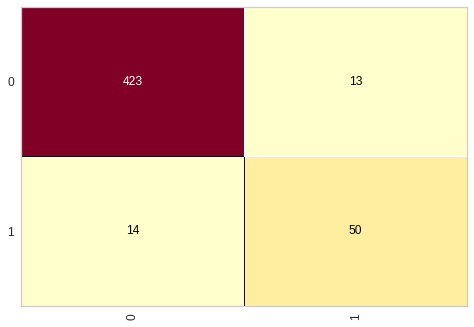

In [33]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

# Relatório

In [34]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



##Analisando a Base de dados do Census - Logistic Regression

Carregando os dados

In [35]:
with open('/content/census.pkl', 'rb') as f:
  X_census_treino, y_census_treino, X_census_teste, y_census_teste = pickle.load(f)

In [36]:
# shapes
print('X treinamento', X_census_treino.shape)
print('X teste', X_census_teste.shape)
print('y treinamento', y_census_treino.shape)
print('y teste', y_census_teste.shape)

X treinamento (27676, 108)
X teste (4885, 108)
y treinamento (27676,)
y teste (4885,)


# Modelo

In [38]:
logistic_census = LogisticRegression(random_state= 1)
logistic_census.fit(X_census_treino, y_census_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# previsoes

In [39]:
previsoes_census = logistic_census.predict(X_census_teste)
previsoes_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [40]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

## Acuracia

In [41]:
accuracy_score(y_census_teste, previsoes_census)

0.849539406345957

##Matriz de Confusão

0.849539406345957

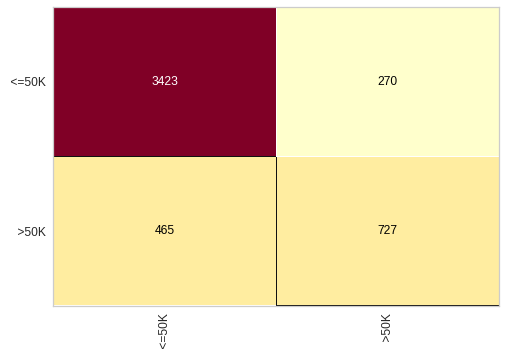

In [44]:
cmc = ConfusionMatrix(logistic_census)
cmc.fit(X_census_treino, y_census_treino)
cmc.score(X_census_teste, y_census_teste)

# Análise de Relatório

In [45]:
print(classification_report(y_census_teste, previsoes_census))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885

